In [1]:
#loading the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google_play_scraper import app
from google_play_scraper import Sort, reviews_all
from datetime import datetime,date
import warnings
warnings.filterwarnings('ignore')
import emoji
import unicodedata 
import sys
import spacy
from collections import Counter
import en_core_web_sm
from textblob import TextBlob
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag

In [84]:
#getting the general information from Google Play page of TuneIn Radio app

result = app(
    'tunein.player',
    lang='en', # defaults to 'en'
    country='us' # defaults to 'us'
)

In [85]:
#printing the retrived information
print(result)

{'title': 'TuneIn Radio: News, Sports, Music & Radio Stations', 'description': "<b>FROM NOW ON, THIS IS RADIO.</b>\r\n\r\nTuneIn brings together live news, sports, music, podcasts and radio stations from around the world.\r\n\r\nWith live and on-demand audio from the voices you trust, on any device, you're never without something amazing to listen to.\r\n\r\n\r\n<b>ALL YOUR AUDIO IN ONE APP.</b>\r\n\r\n• <b>News</b>: Listen to and stay informed with live 24/7 news from local, national and global news sources, including CNN, MSNBC, FOX News Radio, NPR and BBC.\r\n\r\n• <b>Sports</b>: Listen to your sports team wherever you go with local, national and global sports talk stations.\r\n\r\n• <b>Music</b>: Soundtrack your life with listening to exclusive music stations and channels, including Today's Hits, Classic Rock Hits and Country Roads.\r\n\r\n• <b>Podcasts</b>: We've got all your must listen podcasts right here.\r\n\r\n• <b>Radio</b>: Stream over 100,000 AM, FM and internet radio stat

In [104]:
#getting the reviews data

result_test = reviews_all(
    'tunein.player',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    #sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    #filter_score_with=5 # defaults to None(means all score)
)

In [82]:
#checking the total number of reviews
len(result_test)

194139

In [144]:
#creating a dataframe from the reviews data
df_test = pd.DataFrame(result_test)
df_test.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,Tony Bennett,https://play-lh.googleusercontent.com/-HlnFSIV...,I liike it,5,0,25.9,2021-03-16 10:02:55,None,NaT
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Walter Eshaghzadeh,https://play-lh.googleusercontent.com/-7lZ2XN4...,Good,4,0,26.2.2,2021-03-16 09:15:57,None,NaT
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,raynard hodge,https://play-lh.googleusercontent.com/-xz5DLhR...,Wonder selection of music from all around the ...,5,0,26.2.2,2021-03-16 08:46:09,None,NaT
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,Ahmed Hassan,https://play-lh.googleusercontent.com/a-/AOh14...,"I'm using TuneIn Radio since 2011 until now,th...",5,0,26.2.2,2021-03-16 08:16:21,None,NaT
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,Angelo Estrada,https://play-lh.googleusercontent.com/a-/AOh14...,App is Good but Reason Why is The Amazon App h...,1,0,None,2021-03-16 07:29:58,None,NaT


In [145]:
#for privacy concerbs dropping the columns 'username' and "userImage"
df=df_test.drop(['userName', 'userImage'], axis=1)
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,5,0,25.9,2021-03-16 10:02:55,None,NaT
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,4,0,26.2.2,2021-03-16 09:15:57,None,NaT
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,5,0,26.2.2,2021-03-16 08:46:09,None,NaT
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,"I'm using TuneIn Radio since 2011 until now,th...",5,0,26.2.2,2021-03-16 08:16:21,None,NaT
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,1,0,None,2021-03-16 07:29:58,None,NaT


In [134]:
df.shape

(194229, 8)

In [146]:
#transforming the date columns to datetime format
df['at'] = pd.to_datetime(df['at'])
df['repliedAt']=pd.to_datetime(df['repliedAt'])
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,5,0,25.9,2021-03-16 10:02:55,None,NaT
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,4,0,26.2.2,2021-03-16 09:15:57,None,NaT
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,5,0,26.2.2,2021-03-16 08:46:09,None,NaT
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,"I'm using TuneIn Radio since 2011 until now,th...",5,0,26.2.2,2021-03-16 08:16:21,None,NaT
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,1,0,None,2021-03-16 07:29:58,None,NaT


In [150]:
#saving the scraped data to an xlsx file
df['at'] = df['at'].dt.strftime('%Y/%m/%d')
df['repliedAt']=df['repliedAt'].dt.strftime('%Y/%m/%d')
df.to_excel("google__reviews_tunein_radio.xlsx")

In [157]:
#converting the NaT to None
df['at']=pd.to_datetime(df['at']).dt.normalize().replace({np.nan: None})
df['repliedAt']=pd.to_datetime(df['repliedAt']).dt.normalize().replace({np.nan: None})
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,5,0,25.9,2021-03-16,None,None
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,4,0,26.2.2,2021-03-16,None,None
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,5,0,26.2.2,2021-03-16,None,None
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,"I'm using TuneIn Radio since 2011 until now,th...",5,0,26.2.2,2021-03-16,None,None
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,1,0,None,2021-03-16,None,None


In [158]:
#checking the data types
df.dtypes

reviewId                        object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt                       object
dtype: object

In [643]:
#looking at the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194229 entries, 0 to 194228
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              194229 non-null  object
 1   content               193277 non-null  object
 2   score                 194229 non-null  int64 
 3   thumbsUpCount         194229 non-null  int64 
 4   reviewCreatedVersion  172001 non-null  object
 5   at                    194229 non-null  object
 6   replyContent          5548 non-null    object
 7   repliedAt             5548 non-null    object
dtypes: int64(2), object(6)
memory usage: 13.3+ MB


In [644]:
#checking the number of missing values
df.isnull().sum()

reviewId                     0
content                    952
score                        0
thumbsUpCount                0
reviewCreatedVersion     22228
at                           0
replyContent            188681
repliedAt               188681
dtype: int64

In [646]:
#summary information for the numeric variables
df.describe()

,score,thumbsUpCount
count,194229.000000,194229.000000
mean,4.173867,0.676907
std,1.368424,6.731956
min,0.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,817.000000


In [653]:
#summary information of the rest of the data frame
df_cat=df.drop(columns=['score','thumbsUpCount'])
df_cat.describe()

,reviewId,content,reviewCreatedVersion,at,replyContent,repliedAt
count,194229,193277,172001,194229,5548,5548
unique,194229,148027,228,3849,3904,674
top,gp:AOqpTOHf9JIzHAMWYkcRbOlfL-aWfFr4ucB0F0HpJHK...,Good,1.5,2016/04/08,I'm sorry that you are having issues - please ...,2020/09/14
freq,1,2647,7116,483,210,132


In [2]:
#reading the previously created dataframe from the file
import pandas as pd
dfile = pd.read_excel("google__reviews_tunein_radio.xlsx", index_col=0)
dfile.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,5,0,25.9,2021/03/16,NaN,NaN
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,4,0,26.2.2,2021/03/16,NaN,NaN
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,5,0,26.2.2,2021/03/16,NaN,NaN
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,"I'm using TuneIn Radio since 2011 until now,th...",5,0,26.2.2,2021/03/16,NaN,NaN
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,1,0,NaN,2021/03/16,NaN,NaN


In [4]:
#changing the time and date format and handling the way missing values are represented
from datetime import datetime,date
import numpy as np
dfile['at'] = pd.to_datetime(dfile['at']).dt.normalize().replace({np.nan: None})
dfile['repliedAt']=pd.to_datetime(dfile['repliedAt']).dt.normalize().replace({np.nan: None})
dfile=dfile.replace({np.nan: None})
dfile.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,5,0,25.9,2021-03-16,None,None
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,4,0,26.2.2,2021-03-16,None,None
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,5,0,26.2.2,2021-03-16,None,None
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,"I'm using TuneIn Radio since 2011 until now,th...",5,0,26.2.2,2021-03-16,None,None
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,1,0,None,2021-03-16,None,None


In [5]:
#checking the number of observations and columns
dfile.shape

(194229, 8)

5,548 reviews have been addressed

In [7]:
#engineering new variables for easier visualization analysis 
dfile['year'] = pd.DatetimeIndex(dfile['at']).year 
dfile['month'] = pd.DatetimeIndex(dfile['at']).month
dfile['day'] = pd.DatetimeIndex(dfile['at']).day
dfile.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month,day
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,5,0,25.9,2021-03-16,None,None,2021,3,16
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,4,0,26.2.2,2021-03-16,None,None,2021,3,16
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,5,0,26.2.2,2021-03-16,None,None,2021,3,16
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,"I'm using TuneIn Radio since 2011 until now,th...",5,0,26.2.2,2021-03-16,None,None,2021,3,16
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,1,0,None,2021-03-16,None,None,2021,3,16


In [8]:
#confirming we have new columns
dfile.columns

Index(['reviewId', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'at', 'replyContent', 'repliedAt', 'year', 'month', 'day'],
      dtype='object')

In [46]:
#defining sentiment. If the data has a rating of 1,2 the label assignment will be neg (negative), 
#if the rating is 4,5 the sentiment is pos (positive), 
#the rating of 3 is labeled as neu (neutral)
dfile['score'] = dfile['score'].replace(5,'pos')
dfile['score']= dfile['score'].replace(4,'pos')
dfile['score'] = dfile['score'].replace(3,'neu')
dfile['score'] = dfile['score'].replace(2,'neg')
dfile['score'] = dfile['score'].replace(1,'neg')


In [47]:
#checking the changes
dfile.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month,day
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyisrmXXdUBveR8cFKvPEYVis7gO5Pf4v3NBlwsF6f5w6cg,I liike it,pos,0,25.9,2021-03-16,None,None,2021,3,16
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonrFJYpdYlBngg9Z4ctR3mQUO8KmUUELpTT7B1j5VM8Aww,Good,pos,0,26.2.2,2021-03-16,None,None,2021,3,16
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2SvZVkAgyj4a5egJFn9w1mcsfEyn4DExlWjIjf0dXWxw,Wonder selection of music from all around the world. The options of smooth jazz are awesome,pos,0,26.2.2,2021-03-16,None,None,2021,3,16
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mDbcop4PuFVQdLrBK-lIN8hoynpJLT0teqzUtzVNQvPhQ,"I'm using TuneIn Radio since 2011 until now,this is my official internet Radio application on my phone.",pos,0,26.2.2,2021-03-16,None,None,2021,3,16
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00XB9IeLVjBRw4h6kHkzeZZarVXT-nZuxK6iZbq2iVSbw,App is Good but Reason Why is The Amazon App have a quick Download and I Got Kick When I Quit the app.. So I give them 1 star for now,neg,0,None,2021-03-16,None,None,2021,3,16


In [17]:
#looking at the neutral class only
df_neutral=dfile[dfile['score']=='neu']
df_neutral.shape

(10036, 11)

In [44]:
#identifying the questions in the neutral class that will need to be addressed by the customer support
pd.set_option('display.max_colwidth', None)
sub='?'
df_neutral["Indexes"]= df_neutral["content"].str.find(sub)
df_neutral_question=df_neutral[df_neutral['Indexes']!=-1]
df_neutral_question_2021=df_neutral_question[df_neutral_question['year']==2021]
df_neutral_question_2021_Support=df_neutral_question_2021[['reviewId', 'content']]
df_neutral_question_2021_Support

C:\Users\natac\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reviewId,content
103,gp:AOqpTOECtNu9NieZFwsucspCWYtZv0Ffh_mayv8SK81u2HNh8rsOFzEFlq1ue4xhrXUVdw6AzUzL_heYezUZPQ,"I JUST, JUST THAT IS, UPDATED THIS APP, MORE THAN ONCE VERY RECENTLY. ARE THE UPDATE PEOPLE 👉 RUNNING THE ASYLUM? 😂😂😂😂😂😂 MAYBE SOMEONE SHOULD ""ROAD TEST"" THESE UPDATES BEFORE THEY'RE RELEASED, YA TH_U_NK??? WHY ISN'T THERE TIME TO DO IT RIGHT THE FIRST TIME, BUT THERE'S ALWAYS TIME TO DO IT OVER?? 🤔🤔"
107,gp:AOqpTOE-aJEAzDnZXszKtMZrutZkDZKQp_P24BjkMdgtWYcRq9GOBHq7AN7EsjITVKU07CxppBIFwCQh4RGH6g,What happened to the fast forward & rewind buttons?
221,gp:AOqpTOGAyuZJ6hoznn845ERWSz_aFnz3J1M6sY6FJ3arfuAx5pP3FNimwZmDGJdPJHGiV5kpCIAv34L-mnu4qA,"Too expensive for just radio and boardcasting . Not exactly live, there is time lag or recording. The trial version is full of annoying ads.why is that?"
592,gp:AOqpTOG9WA78HpgjBdz-HrKrdACkEnVc4gZRIBjotayFLgRPvOkowM9vjtdilgo1f2PsU9rdVnaa3BBJsvlaTg,"Turns itself on in the car even when I don't want it. Make it stop! Auto Restart is disabled. Also, the Push Notifications button is confusing. Is it on or off??"
757,gp:AOqpTOEZNxpSaoIxKGE0LG7qAYtz10w1SMxiIuhF6kBNcruLbbJ18Qn7dxi46pcXaNFZh0h-I9IBGXvd9YnULw,It's OK but why the random streaming? - I don't have a subscription I pay for and just use it primarily to listen to radio stations with no problems. Ads are about as consistent as listening to the radio. What I have run into is finding the program randomly playing when I'm not even logged into it and then have to open the app to turn it off.🤷‍♀️
985,gp:AOqpTOH1xZGfwgGHYYFkW-3iyXdYa_u74RQCrpC106co7F-T-qio0agptP_BxeQ-mxhlp8u7xrCHpUcpVCW6jQ,"This app is very useful for podcasts and live cable news audio. 2 problems lately; won't play video without a 3rd party app, and widget changes are frustrating. I like viewing/choosing from recently played channels, but don't like that I can't actually open the app or stop play with the widget. 2021 edit: I subscribed to TuneIn Live/ commercial free last year. I've had it for about 6 months. I really only listen to MSNBC, otherwise I listen to NPR which is already commercial free. I end up listening to commercials sometimes. Not all the time I grant you, but still. I've contacted TuneIn support numerous times and they express sympathy but don't actually do anything. When I asked for the balance of my subscription cost they asked for time/date/content of commercials that I was hearing, as if I'm lying? They blame it on the network. I really don't care, I'm paying TuneIn so I consider ""commercial free"" to be just that. So I guess overall I'm expressing that my experience with the subscription of customer support has been bad. Also lots of losing connection to server. Just not a great experience, I wish there was another option for live news broadcast. And the battery drain on my phone is huge; seems to have increased dramatically this year. Enough so that I have to recharge my phone after about 8 hours of usage. I'm careful to close unused apps in the background."
1200,gp:AOqpTOGZSozRUDZOk8QYfL-NBYBdXDQF4FCFVQXOr42XrH2KJA7c6bEBRC7GGMbDuwAfkGNXl_SBJa_Y43WWMg,Why does this app auto start when Bluetooth is turned on?
1299,gp:AOqpTOG4qr8pWg5-wPZw8dxpVtq4c6CGZO4In5OCKCf869CckSarf_MwWLGYhfKDhFSNb5ILe7OWlxmcgB9Z9A,"2 major annoyances: - For some reason it prompts me to select an email adress every time I open the app. I click it away and the app works fine. Why is the email prompt there? - On the top right it keeps showing alarm at startup and 3 seconds later it shows the Chromecast logo. This is really annoying since I need the alarm settings every day and I don't have a Chromecast. When the Chromecast button appears, it ""pushes"" the alarm button into the little menu, but it's the only item? Why the menu?"
2115,gp:AOqpTOHPZTJUaR2W5rdcJWHkpWUNB4VZ-HxskxQke80g8_EmU3ovPprkvMd66_I6--iZoi0G91NKknPV7qWrrw,What happened? Bookmarks disappeared and now I need an an account to save them? Nothing will even play anymore. It just errors out. Edit: and the next day i

In [88]:
#changing the column width
pd.set_option('display.max_colwidth', 50)
df_neutral_question_2021_Support

,reviewId,content
103,gp:AOqpTOECtNu9NieZFwsucspCWYtZv0Ffh_mayv8SK81...,"I JUST, JUST THAT IS, UPDATED THIS APP, MORE T..."
107,gp:AOqpTOE-aJEAzDnZXszKtMZrutZkDZKQp_P24BjkMdg...,What happened to the fast forward & rewind but...
221,gp:AOqpTOGAyuZJ6hoznn845ERWSz_aFnz3J1M6sY6FJ3a...,Too expensive for just radio and boardcasting ...
592,gp:AOqpTOG9WA78HpgjBdz-HrKrdACkEnVc4gZRIBjotay...,Turns itself on in the car even when I don't w...
757,gp:AOqpTOEZNxpSaoIxKGE0LG7qAYtz10w1SMxiIuhF6kB...,It's OK but why the random streaming? - I don'...
985,gp:AOqpTOH1xZGfwgGHYYFkW-3iyXdYa_u74RQCrpC106c...,This app is very useful for podcasts and live ...
1200,gp:AOqpTOGZSozRUDZOk8QYfL-NBYBdXDQF4FCFVQXOr42...,Why does this app auto start when Bluetooth is...
1299,gp:AOqpTOG4qr8pWg5-wPZw8dxpVtq4c6CGZO4In5OCKCf...,2 major annoyances: - For some reason it promp...
2115,gp:AOqpTOHPZTJUaR2W5rdcJWHkpWUNB4VZ-HxskxQke80...,What happened? Bookmarks disappeared and now I...
2349,gp:AOqpTOHiatLYnRvpdxwp4tOsi-ffm9HQDyBXJJlOAo3...,I'm in UK and when I try to listen to my Local...


In [89]:
#counting the number of observations that contain the conjunction "but" which is an indicator of the mixed sentiment
sub='but'
df_neutral["but"]= df_neutral["content"].str.find(sub)
df_neutral_but=df_neutral[df_neutral['but']==-1]
df_neutral_but.shape

(7559, 14)

75.31% of the reviews contain the "but" conjunction.

In [91]:
#removing the values whose rating has 0 since it is no longer used for rating the apps
dfile = dfile[dfile.score != 0]

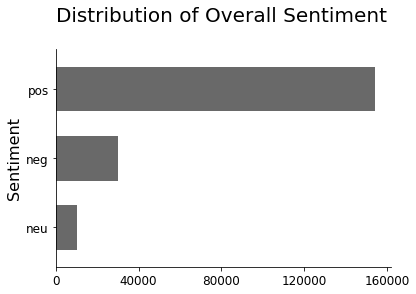

In [92]:
#creating a bar graph of overall sentiment
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (6,4))
ax = dfile['score'].value_counts().sort_values(ascending=True).plot(kind='barh',color = 'dimgray',fontsize=12, width = 0.65)
RUNS= (0,40000,80000,120000,160000)
plt.xticks(RUNS)
#customizing the title
ax.set_title('Distribution of Overall Sentiment\n', fontsize=20,  loc='left')
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
ax.set_ylabel('Sentiment', fontsize=16);
plt.show()

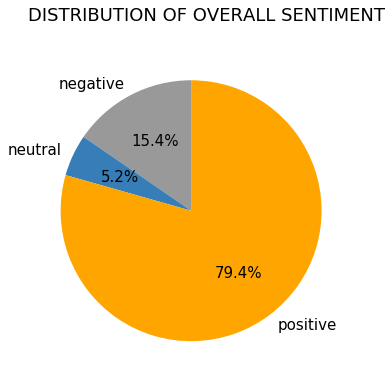

In [93]:
#overall sentiment pie chart
score= dfile['score']
#color choice
colors = [ '#999999','#377eb8','orange']
keys, counts = np.unique(score, return_counts=True)
#customizing it
plt.figure(figsize=(6,6))
labels=['negative', 'neutral','positive']
plt.pie(counts, labels=labels,colors = colors, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 15})
plt.rcParams['font.size'] = 25
plt.title("DISTRIBUTION OF OVERALL SENTIMENT\n", fontsize=18,  loc='left')
plt.show()

In [94]:
#subsetting the dataframe to only work with the columns score and year for the visualization purposes
newdf=dfile[['score', 'year']]
plottable= newdf.groupby([ 'year', 'score']).size().unstack()

In [95]:
#creating the variables that will inform us about the percentahe of the sentiment for each year
plottable['percentage_neg']= round((plottable['neg'] / 
                      (plottable['neg']+ plottable['pos']+plottable['neu']))*100,1)
plottable['percentage_pos']= round((plottable['pos'] / 
                      (plottable['neg']+ plottable['pos']+plottable['neu']))*100,1)
plottable['percentage_neu']= round((plottable['neu'] / 
                      (plottable['neg']+ plottable['pos']+plottable['neu']))*100,1)



In [96]:
#dropping the variables we won't need
plottable_percentage=plottable.drop(['neg', 'pos', 'neu'], axis=1)
plottable_percentage.head()

score,percentage_neg,percentage_pos,percentage_neu
year,,,
2010,7.7,86.7,5.6
2011,14.6,77.0,8.4
2012,13.8,80.4,5.8
2013,13.3,80.9,5.8
2014,23.0,69.5,7.5


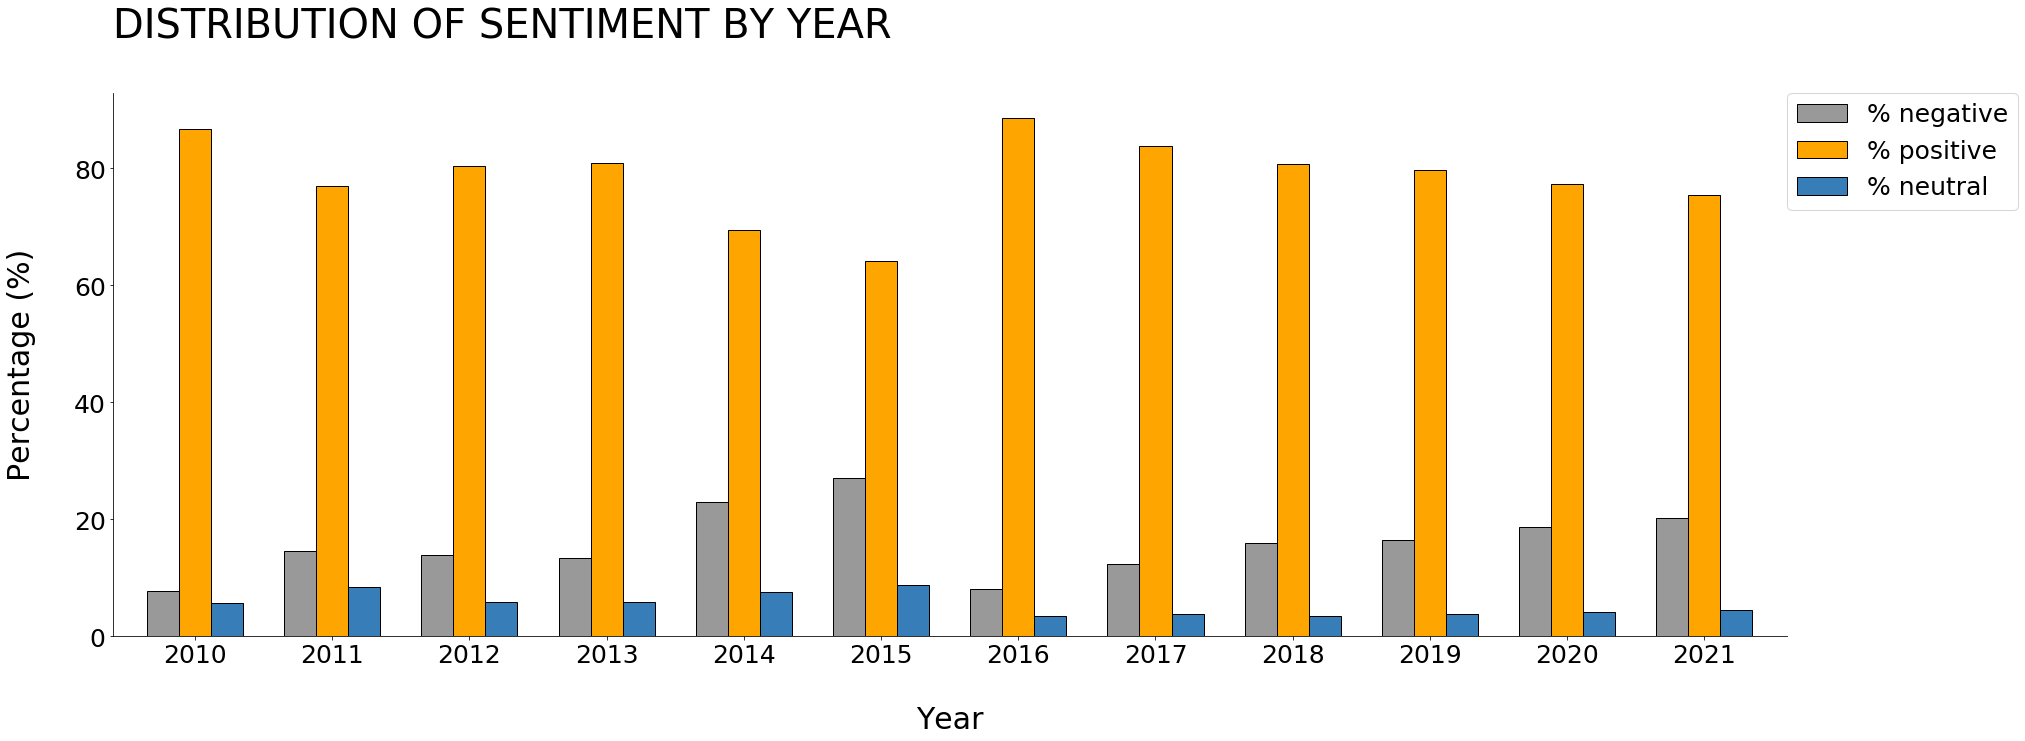

In [97]:
#looking at the sentiment over time
colors = ['#999999', 'orange', '#377eb8']
ax = plottable_percentage.plot(kind='bar', color = colors, edgecolor='black',fontsize=14, figsize=(30,10), width=0.7)
#customizing the title
ax.set_title("DISTRIBUTION OF SENTIMENT BY YEAR\n", fontsize=40, loc='left')
#customizing x label
ax.set_xlabel('\nYear', fontsize=30)
#customizing y label
mylabels=['% negative', '% positive', '% neutral']
ax.set_ylabel('Percentage (%)\n', fontsize=30);
plt.xticks(rotation=0, fontsize = 25);
plt.yticks(rotation=0, fontsize = 25);
plt.legend(bbox_to_anchor=(1, 1),labels=mylabels, loc='upper left', borderaxespad=0., fontsize=25)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
plt.show()

In [98]:
#creating a dataframe with data for Q1 of 2021
df_year_2021 = dfile[dfile['year']== 2021]
df_year_2021.shape

(2702, 11)

In [99]:
#getting the data ready by using griupby to visualize the information on Q1, 2021 sentiment
newdf_month=df_year_2021[['score', 'month']]
newdf_month['month']=newdf_month['month'].replace(1,'January')
newdf_month['month']=newdf_month['month'].replace(2,'February')
newdf_month['month']=newdf_month['month'].replace(3,'March')
plottable_month= newdf_month.groupby(['month','score']).size().unstack()
plottable_month = plottable_month.reindex(index = ['January','February','March'])
plottable_month.head()

score,neg,neu,pos
month,,,
January,250,48,872
February,195,44,754
March,101,26,412


In [100]:
#calculating percentage
plottable_month['percentage_neg']= round((plottable_month['neg'] / 
                      (plottable_month['neg']+ plottable_month['pos']+plottable_month['neu']))*100,1)
plottable_month['percentage_pos']= round((plottable_month['pos'] / 
                      (plottable_month['neg']+ plottable_month['pos']+plottable_month['neu']))*100,1)
plottable_month['percentage_neu']= round((plottable_month['neu'] / 
                      (plottable_month['neg']+ plottable_month['pos']+plottable_month['neu']))*100,1)

In [101]:
#dropping the variables we won't use in the graph
plottable_percentage_month=plottable_month.drop(['neg', 'pos', 'neu'], axis=1)
plottable_percentage_month.head()

score,percentage_neg,percentage_pos,percentage_neu
month,,,
January,21.4,74.5,4.1
February,19.6,75.9,4.4
March,18.7,76.4,4.8


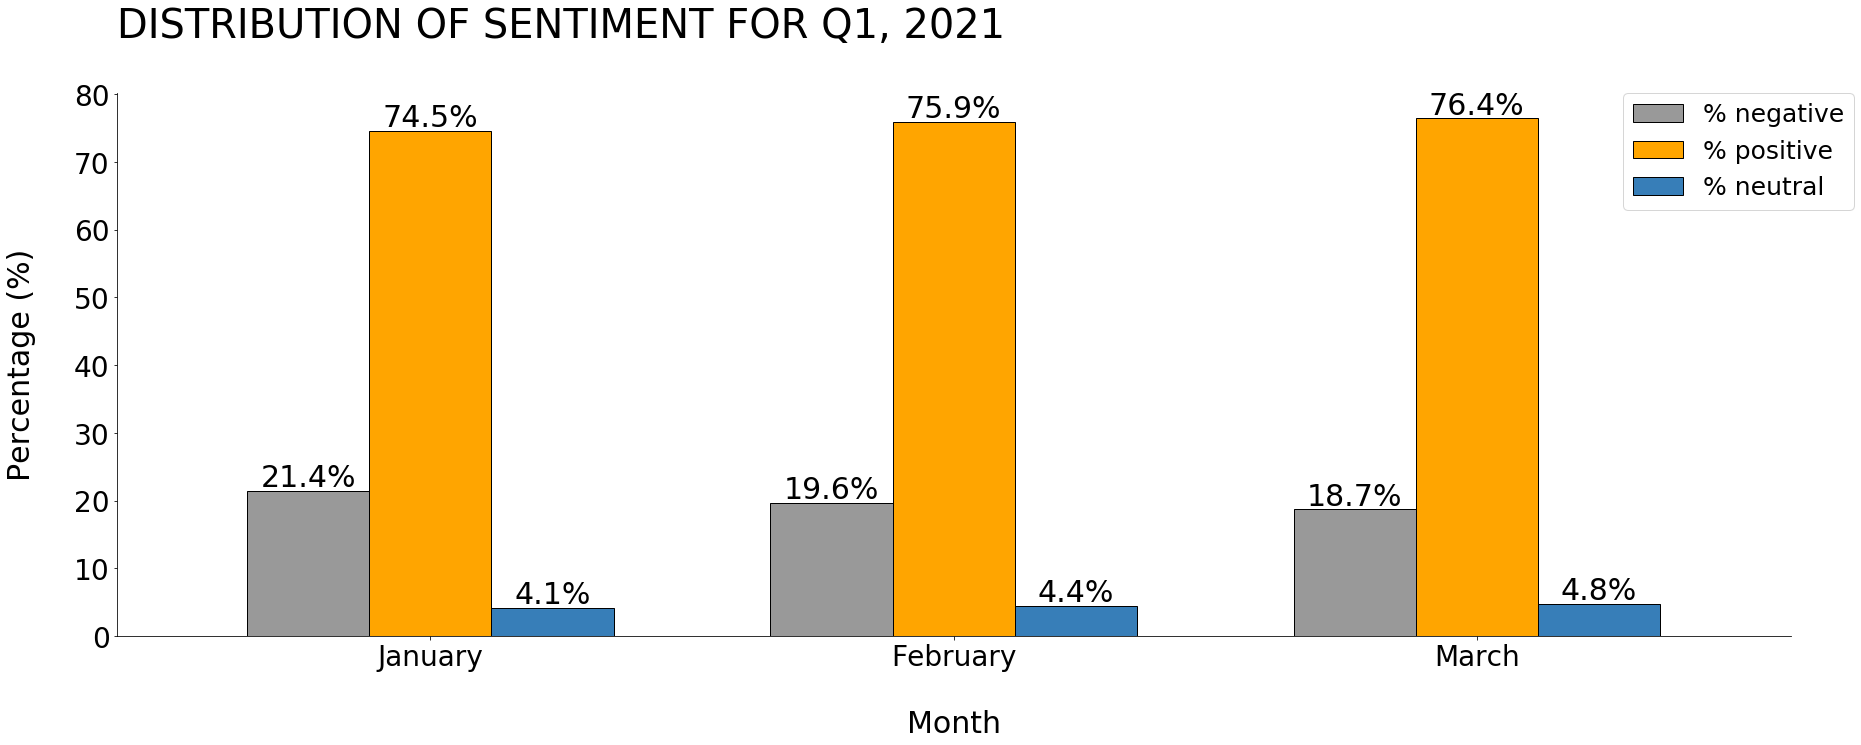

In [102]:
#plotting sentiment destribution of the Q1 
colors = ['#999999', 'orange', '#377eb8']
ax = plottable_percentage_month.plot(kind='bar', color = colors, edgecolor='black',fontsize=24, figsize=(30,10), width=0.7)
#customizing the title
ax.set_title("DISTRIBUTION OF SENTIMENT FOR Q1, 2021\n", fontsize=40, loc='left')
#customizing x label
ax.set_xlabel('\nMonth', fontsize=30)
#customizing y label
ax.set_ylabel('Percentage (%)\n', fontsize=30);
plt.xticks(rotation=0, fontsize = 28);
plt.yticks(rotation=0, fontsize = 28);
mylabels=['% negative', '% positive', '% neutral']
plt.legend(bbox_to_anchor=(0.9, 1), labels=mylabels,loc='upper left', borderaxespad=0., fontsize=25)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}%'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.7), ha = 'center', fontsize=30)
plt.show();

In [103]:
#creating a daraframe with negative sentiment only
dfile_neg=dfile[dfile['score']== 'neg']

In [104]:
#engineering another feature that has a value of yes if the review has been replied to and no if it hasn't been.
dfile_neg['reply']=np.where(dfile_neg['replyContent'].isnull(), 'no', 'yes')


In [105]:
#pivoting the necessary data
dfile_neg_year=dfile_neg[['reply', 'year']]
plottable_neg_year= dfile_neg_year.groupby(['year','reply']).size().unstack()
plottable_neg_year['no'] = plottable_neg_year['no'].fillna(0)
plottable_neg_year['yes'] = plottable_neg_year['yes'].fillna(0)
plottable_neg_year.head()

reply,no,yes
year,,
2010,466.0,0.0
2011,1897.0,0.0
2012,1861.0,182.0
2013,2029.0,15.0
2014,4791.0,177.0


In [106]:
#percentage of replies that have been replied to and those that haven't been replied to
plottable_neg_year['percentage_no']= round((plottable_neg_year['no'] / 
                      (plottable_neg_year['no']+ plottable_neg_year['yes']))*100,1)
plottable_neg_year['percentage_yes']= round((plottable_neg_year['yes'] / 
                      (plottable_neg_year['no']+ plottable_neg_year['yes']))*100,1)

In [107]:
#dropping the variables that won't be used in the graph
plottable_neg_year=plottable_neg_year.drop(['no', 'yes'], axis=1)
plottable_neg_year.head()

reply,percentage_no,percentage_yes
year,,
2010,100.0,0.0
2011,100.0,0.0
2012,91.1,8.9
2013,99.3,0.7
2014,96.4,3.6


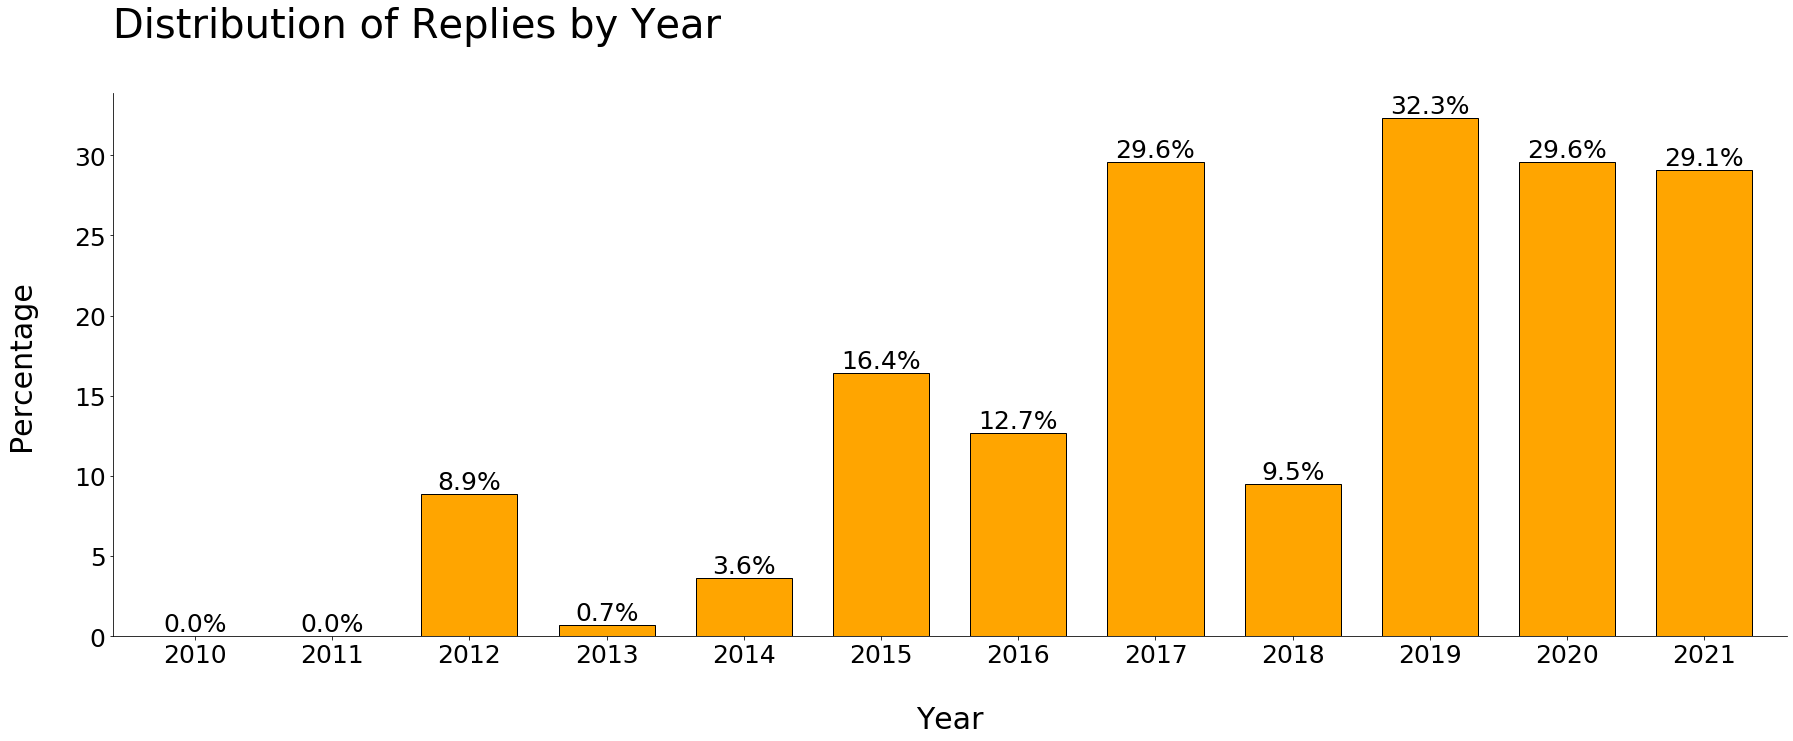

In [108]:
#plotting sentiment destribution of replies by year
colors = ['orange']
ax = plottable_neg_year['percentage_yes'].plot(kind='bar', color = colors, edgecolor='black',fontsize=14, figsize=(30,10), width=0.7)
#customizing the title
ax.set_title("Distribution of Replies by Year\n", fontsize=40, loc='left')
#customizing x label
ax.set_xlabel('\nYear', fontsize=30)
#customizing y label
ax.set_ylabel('Percentage\n', fontsize=30);
plt.xticks(rotation=0, fontsize = 25);
plt.yticks(rotation=0, fontsize = 25);
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}%'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.3), ha = 'center')
plt.show();

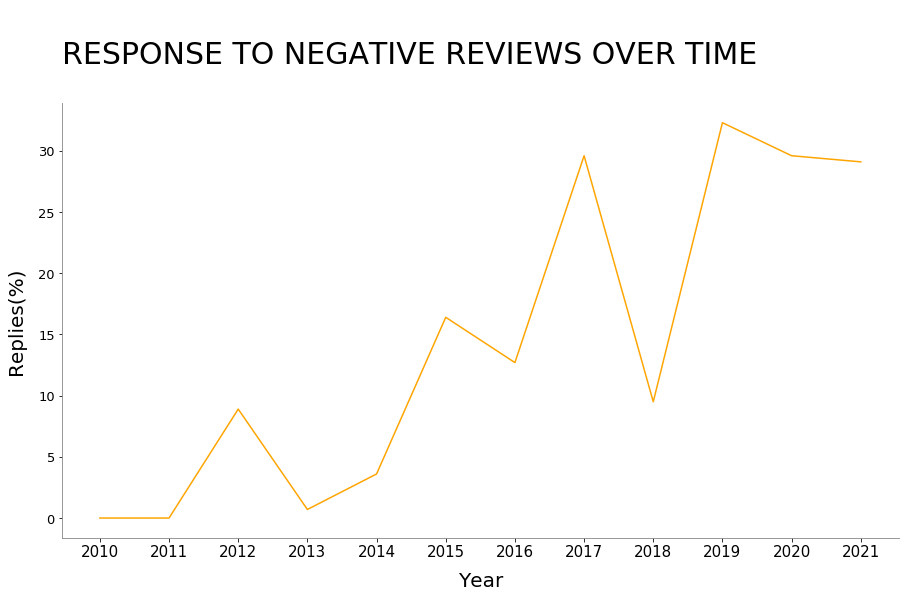

In [109]:
#creating a line chart with distribution of eplies to negative reviews over time
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor('w')
year = plottable_neg_year.index.values
replies = plottable_neg_year['percentage_yes']
ax.plot(year, replies,color = 'orange' )
ax.set_title('\nRESPONSE TO NEGATIVE REVIEWS OVER TIME\n', fontsize=30,  loc='left')
ax.set_ylabel('Replies(%)', fontsize=20, labelpad=12)
ax.set_xlabel('Year', fontsize=20, labelpad=12)
ax.grid(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax = plt.gca()
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=13) 
plt.xticks(year)
plt.show();

In [110]:
#getting the data ready for the distribution of replies for Q1, 2021
dfile_neg_2021 = dfile_neg[dfile_neg['year']== 2021]
newdf_month_replies=dfile_neg_2021[['reply', 'month']]
newdf_month_replies['month']=newdf_month_replies['month'].replace(1,'January')
newdf_month_replies['month']=newdf_month_replies['month'].replace(2,'February')
newdf_month_replies['month']=newdf_month_replies['month'].replace(3,'March')
plottable_month_replies= newdf_month_replies.groupby(['month','reply']).size().unstack()
plottable_month_replies= plottable_month_replies.reindex(index = ['January','February','March'])
plottable_month_replies.head()

reply,no,yes
month,,
January,191,59
February,150,45
March,46,55


In [111]:
#calculating the percentage
plottable_month_replies['percentage_no']= round((plottable_month_replies['no'] / 
                      (plottable_month_replies['no']+ plottable_month_replies['yes']))*100,1)
plottable_month_replies['percentage_yes']= round((plottable_month_replies['yes'] / 
                      (plottable_month_replies['no']+ plottable_month_replies['yes']))*100,1)
plottable_month_replies.head()

reply,no,yes,percentage_no,percentage_yes
month,,,,
January,191,59,76.4,23.6
February,150,45,76.9,23.1
March,46,55,45.5,54.5


In [112]:
#dropping the variables not needed for the graph
plottable_month_replies=plottable_month_replies.drop(['no', 'yes'], axis=1)
plottable_month_replies.head()

reply,percentage_no,percentage_yes
month,,
January,76.4,23.6
February,76.9,23.1
March,45.5,54.5


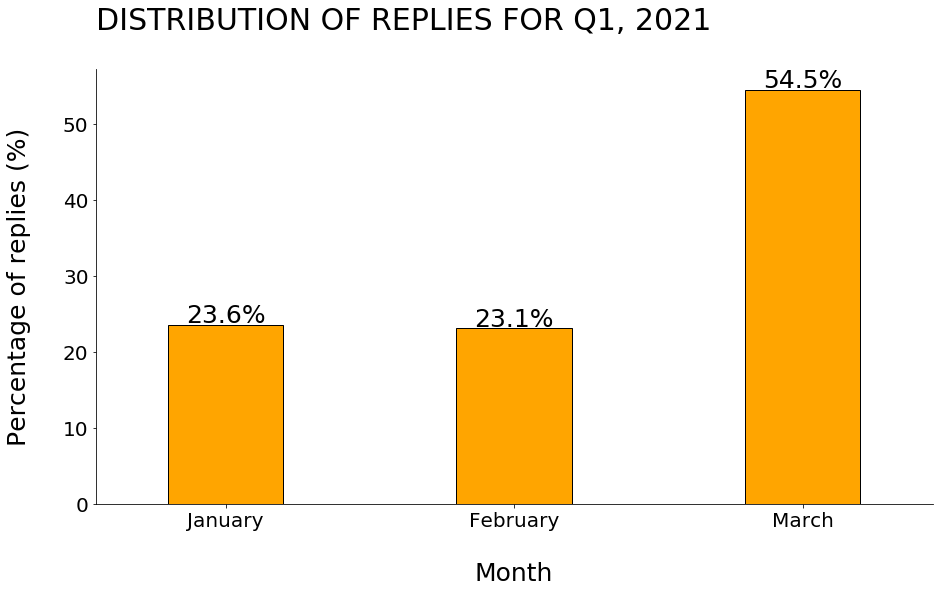

In [113]:
#plotting sentiment destribution of the Q1 
colors = ['orange']
ax = plottable_month_replies['percentage_yes'].plot(kind='bar', color = colors, edgecolor='black',fontsize=14, figsize=(15,8), width=0.4)
#customizing the title
ax.set_title("DISTRIBUTION OF REPLIES FOR Q1, 2021\n", fontsize=30, loc='left')
#customizing x label
ax.set_xlabel('\nMonth', fontsize=25)
#customizing y label
ax.set_ylabel('Percentage of replies (%)\n', fontsize=25);
plt.xticks(rotation=0, fontsize = 20);
plt.yticks(rotation=0, fontsize = 20);
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}%'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.3), ha = 'center')
plt.show();

In [114]:
#looking at the replies for March
dfile_neg_2021_march=dfile_neg_2021[dfile_neg_2021['month']==3]
dfile_neg_2021_march.shape                                  

(101, 12)

In [115]:
#looking at the relevant negative reviews 
dfile_neg_2021_march_sorted = dfile_neg_2021_march.sort_values(by=['thumbsUpCount'], ascending=False)
dfile_neg_2021_march_sorted_top=dfile_neg_2021_march_sorted[dfile_neg_2021_march_sorted['thumbsUpCount']>=2]
dfile_neg_2021_march_sorted_top.shape

(22, 12)

In [117]:
#sorting the data for the negative relevant reviews
dfile_neg_2021_march_sorted_top.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month,day,reply
442,gp:AOqpTOFRMSSm5ZZ8PhHVBsWIM1Yx_rIa48aNHV7c2JE...,"Utter garbage. I don't know how, but it someho...",neg,113,26.1,2021-03-03,Thanks for your feedback Chris. That shouldn't...,2021-03-11 00:00:00,2021,3,3,yes
197,gp:AOqpTOHUa_LG2qSgkNA3dBnBOtFhdgBG9UNp9RjLsa9...,The free version is time waist of time. They t...,neg,78,25.7.3,2021-03-09,Thanks for writing to us. We are aware of this...,2021-01-05 00:00:00,2021,3,9,yes
372,gp:AOqpTOH7rmEgMOcZ5ggOxBgejB9SamxU3R2H953e4lf...,I have enjoyed this ap for years but I will be...,neg,65,26.1,2021-03-05,Thanks for writing to us. That shouldn't be ha...,2021-03-11 00:00:00,2021,3,5,yes
242,gp:AOqpTOEJerP0u69jIkFsBe1lJKWeFTp2YP8CFohU9DT...,I live overseas and I used to use this to list...,neg,45,26.1,2021-03-08,Thank you for writing to us. If you are in the...,2021-03-11 00:00:00,2021,3,8,yes
456,gp:AOqpTOFEQ25Y51yEigK183FE1wgPb1N8GiiYJeGVPJJ...,Long overdue review. For last dozen updates (l...,neg,30,26.1,2021-03-03,Thanks for writing to us. That shouldn't be ha...,2021-03-11 00:00:00,2021,3,3,yes


In [118]:
# negative reviews that need to be addressed 
dfile_need_to_reply = dfile_neg_2021_march_sorted_top[dfile_neg_2021_march_sorted_top['reply']=='no'].reset_index(drop=True)
dfile_need_to_reply_attention=dfile_need_to_reply[['reviewId','thumbsUpCount']]
dfile_need_to_reply_attention

,reviewId,thumbsUpCount
0,gp:AOqpTOHswsCtrKwtl_RIJ3C02hMKPUcFfS1K3IypoJ0...,15
1,gp:AOqpTOH70sN3rOvn7Ise6C0aHR15hFWLcUQ0GOAWPK6...,6
2,gp:AOqpTOF5iCJA0oRV4FRQdm4EmgIEaoCiiCAd69bapqg...,6
3,gp:AOqpTOHkWdjZ4FF371_x1BHo1uAOgZjefWAl7utWG1W...,4
4,gp:AOqpTOEePgZwriSFnu07bhMso94ME-AU9nAj7IypZ4R...,2
5,gp:AOqpTOHoXfUcB9js_T2BmknCNimudg2Tz6qS1gEESZG...,2
6,gp:AOqpTOHWjsHZUn2q3sfaSM19WinuWMqw9BZ1Oy9mW70...,2


In [120]:
#saving the data to work with the topic modeling
df_year_2021_topic=df_year_2021

In [121]:
#removing URLS
df_year_2021_topic['content']=df_year_2021_topic['content'].replace(to_replace=r'https?:\/\/.*[\r\n]*',value='',regex=True)

In [122]:
#converting emojis
df_year_2021_topic['content']=df_year_2021_topic['content'].apply(lambda x: emoji.demojize(x, delimiters=("", "")))


In [123]:
#removing punctuation
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                           if unicodedata.category(chr(i)).startswith('P'))
df_year_2021_topic['content'] = df_year_2021_topic['content'].apply(lambda item: ' '.join([string.translate(punctuation) for string in item.split()]))

In [124]:
df_year_2021_topic.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month,day
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,pos,0,25.9,2021-03-16,None,None,2021,3,16
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,pos,0,26.2.2,2021-03-16,None,None,2021,3,16
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,pos,0,26.2.2,2021-03-16,None,None,2021,3,16
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,Im using TuneIn Radio since 2011 until nowthis...,pos,0,26.2.2,2021-03-16,None,None,2021,3,16
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,neg,0,None,2021-03-16,None,None,2021,3,16


In [125]:
# for natural language processing: named entity recognition
nlp = en_core_web_sm.load()
# for visualizations
%matplotlib inline

In [126]:
#named entity recognition for negative reviews for 2021
df_year_2021_topic_neg=df_year_2021_topic[df_year_2021_topic['score']=='neg']
df_year_2021_topic_neg.shape

(546, 11)

In [127]:
tokens = nlp(''.join(str(df_year_2021_topic_neg.content.tolist())))

In [128]:
#tokenized data
tokens

['App is Good but Reason Why is The Amazon App have a quick Download and I Got Kick When I Quit the app So I give them 1 star for now', 'Does not work with some of my favorite stations', 'DO NOT INSTALL Sold my info I get daily calls a text from strange companys after installing You can not turn it off They are always watching and listening have to go deep into settings just to exit app May have to get new phone and change number just to be sure', 'Trying', 'Same thing happened to me is happening to others It shut itself or stop playing after 20 to 30 sec if i exit the interface', 'Doesnt work on Vivo Y30 Sad', 'It states listen to free radio stations but you have to pay on a subscribion base so how are the radio stations free if you have to pay', 'Not to bad', 'Only ads no radio Forget about Tune in they now play 5 min of ads every 15 minutes You are better off using another software', 'Its okay for what its worth', 'Very stupid Im Canadianmade over seas n u see to listen to my local 

In [129]:
#sorted most frequently used words in negative reviews
ner_list = []
for ent in tokens.ents:
    ner_list.append(ent.text)
        
ner_counts = Counter(ner_list).most_common(10)
df_ner = pd.DataFrame(ner_counts, columns =['text', 'count'])
df_ner['text'] = df_ner['text'].str.replace('\d+', '')
df_ner=df_ner[df_ner['count']>5]
df_ner

,text,count
0,UK,14
1,one,11
2,App,8
3,two,8
4,years,7
5,MSNBC,7
6,BBC,6


In [130]:
#positive reviews for 2021
df_year_2021_topic_pos=df_year_2021_topic[df_year_2021_topic['score']=='pos']


In [131]:
#creating a list of tokens
tokens_pos = nlp(''.join(str(df_year_2021_topic_pos.content.tolist())))
ner_list_pos = []
for ent in tokens_pos.ents:
    ner_list_pos.append(ent.text)
        
ner_counts_pos = Counter(ner_list_pos).most_common(10)
df_ner_pos = pd.DataFrame(ner_counts_pos, columns =['text', 'count'])

In [132]:
#most frequently used words in positive reviews for 2021
df_ner_pos=df_ner_pos[df_ner_pos['text'].astype(str).str.isnumeric()!=True]
df_ner_pos=df_ner_pos[df_ner_pos['count']>5]
df_ner_pos

,text,count
0,Love,121
1,one,17
2,App,13
3,Tunein,9
4,years,9
5,MSNBC,8
7,Nice,7
8,Tunein Radio,6


In [133]:
#neutral sentiment data for 2021
df_year_2021_topic_neu=df_year_2021_topic[df_year_2021_topic['score']=='neu']
df_year_2021_topic_neu.shape

(118, 11)

In [134]:
#a sorted list of tokens for neutral sentiment 2021
tokens_neu = nlp(''.join(str(df_year_2021_topic_neu.content.tolist())))
ner_list_neu = []
for ent in tokens_neu.ents:
    ner_list_neu.append(ent.text)
        
ner_counts_neu = Counter(ner_list_neu).most_common(10)
df_ner_neu = pd.DataFrame(ner_counts_neu, columns =['text', 'count'])
df_ner_neu=df_ner_neu[df_ner_neu['text'].astype(str).str.isnumeric()!=True]
df_ner_neu=df_ner_neu[df_ner_neu['count']>3]
df_ner_neu

,text,count
0,one,8
1,UK,4


In [135]:
#most often used entity recognition items for Q1, 2021
items = [x.text for x in tokens.ents]
list_words = Counter(items).most_common(11)
list_words.remove(('one', 11))
list_words.remove(('two', 8))
list_words.remove(('1', 5))
list_words

[('UK', 14),
 ('App', 8),
 ('years', 7),
 ('MSNBC', 7),
 ('BBC', 6),
 ('Android', 5),
 ('30 seconds', 5),
 ('7 day', 5)]

In [136]:
#converting the list of entity recognitions to a  dataframe
df_list = pd.DataFrame(list_words)
df_list

,0,1
0,UK,14
1,App,8
2,years,7
3,MSNBC,7
4,BBC,6
5,Android,5
6,30 seconds,5
7,7 day,5


In [137]:
#creating a function to represent data in the word cloud
def generate_from_frequencies(self, frequencies):

    frequencies = sorted(frequencies, key=item1, reverse=True)
    frequencies = frequencies[:self.max_words]
    max_frequency = float(frequencies[0][1])

    frequencies = [(word, freq / max_frequency) for word, freq in frequencies]

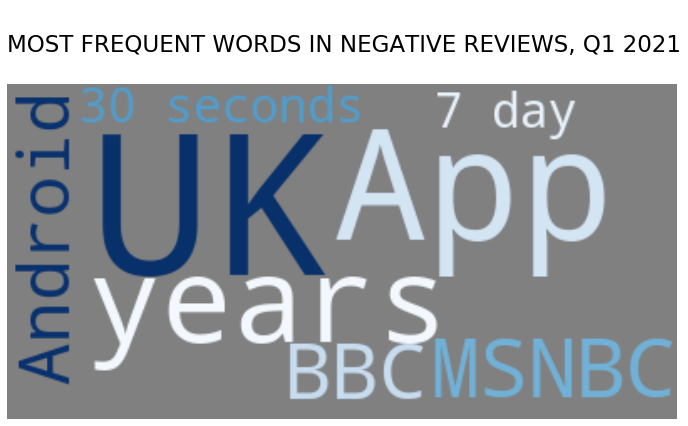

In [138]:
#crating a word cloud
d = {}
for a, x in df_list.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='gray',colormap="Blues")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nMOST FREQUENT WORDS IN NEGATIVE REVIEWS, Q1 2021\n', fontsize=23,  loc='left')

plt.axis("off")
plt.show()

In [139]:
#saving the dataframe to an xlsx file for future use
dfile.to_excel('dfile.xlsx')

In [140]:
#removing URLS
dfile['content']=dfile['content'].replace(to_replace=r'https?:\/\/.*[\r\n]*',value='',regex=True)

In [141]:
#removing numbers from the text
dfile['content']=dfile['content'].str.replace('\d+', '')

In [142]:
dfile['content']=dfile['content'].apply(str)

In [143]:
#converting emojis
import emoji
dfile['content']=dfile['content'].apply(lambda x: emoji.demojize(x, delimiters=("", "")))

In [144]:
#removing punctuation
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                           if unicodedata.category(chr(i)).startswith('P'))
dfile['content']=dfile['content'].apply(lambda item: ' '.join([string.translate(punctuation) for string in item.split()]))

In [479]:
#seeing the results
dfile.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month,day
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,pos,0,25.9,2021-03-16,None,None,2021,3,16
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,pos,0,26.2.2,2021-03-16,None,None,2021,3,16
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,pos,0,26.2.2,2021-03-16,None,None,2021,3,16
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,Im using TuneIn Radio since until nowthis is m...,pos,0,26.2.2,2021-03-16,None,None,2021,3,16
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,neg,0,None,2021-03-16,None,None,2021,3,16


In [480]:
dfile['content']=dfile['content'].str.strip()

In [481]:
#converting to lowercase
dfile['content']=dfile['content'].str.lower()

In [482]:
dfile_copy_1=dfile
dfile_copy_1.to_excel('bigfilr_lowercase.xlsx')

In [354]:
df_excel=pd.read_excel('topic.xlsx')
df_excel.head()

,Unnamed: 0,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month,day
0,0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,like,pos,0,25.9,2021-03-16,NaN,NaT,2021,3,16
1,1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,good,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16
2,2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,wonder selection music around world option smo...,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16
3,3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,using tunein radio since nowthis official inte...,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16
4,4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,pp good reason amazon pp quick download sick s...,neg,0,NaN,2021-03-16,NaN,NaT,2021,3,16


In [483]:
#preprocessing the "content" column
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)



# Lemmatizing
dfile['Lemmatize'] = dfile['content'].apply(lambda x: lemmatize_sentence(x))
print(dfile.head())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\natac\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                                            reviewId  \
0  gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...   
1  gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...   
2  gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...   
3  gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...   
4  gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...   

                                             content score  thumbsUpCount  \
0                                         i liike it   pos              0   
1                                               good   pos              0   
2  wonder selection of music from all around the ...   pos              0   
3  im using tunein radio since until nowthis is m...   pos              0   
4  app is good but reason why is the amazon app h...   neg              0   

  reviewCreatedVersion         at replyContent repliedAt  year  month  day  \
0                 25.9 2021-03-16         None      None  2021      3   16   
1               26.2.2 2021-03-16         No

In [484]:
#creating a new variable 
dfile_nouns=dfile[['Lemmatize']]
dfile_nouns.head()

,Lemmatize
0,i liike it
1,good
2,wonder selection of music from all around the ...
3,im use tunein radio since until nowthis be my ...
4,app be good but reason why be the amazon app h...


In [485]:
#selecting only nouns for better performance and for more information extraction
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if     is_noun(pos)]
    return ' '.join(all_nouns)

In [486]:
dfile_nouns['Lemmatize']=dfile_nouns['Lemmatize'].apply(nouns)
dfile_nouns.head()

,Lemmatize
0,i
1,
2,selection music world option jazz
3,im use tunein radio internet radio application...
4,reason amazon app download i app star


In [487]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
dfile_nouns['Lemmatize']=dfile_nouns['Lemmatize'].apply(lambda item: ' '.join([word for word in item.split() if word not in stop_words]))
dfile_nouns.head()

,Lemmatize
0,
1,
2,selection music world option jazz
3,im use tunein radio internet radio application...
4,reason amazon app download app star


In [489]:
#saving the file with only nouns
dfile_nouns.to_excel('nouns.xlsx')

In [490]:
#tokenizing the reviews
import nltk
from nltk import word_tokenize
dfile_nouns['Lemmatize']=dfile_nouns['Lemmatize'].apply(word_tokenize)

In [492]:
dfile_nouns.head(4)

,Lemmatize
0,[]
1,[]
2,"[selection, music, world, option, jazz]"
3,"[im, use, tunein, radio, internet, radio, appl..."


In [493]:
#resetting the index
dfile_nouns_new=dfile_nouns.reset_index()
dfile_nouns_new.head()

,index,Lemmatize
0,0,[]
1,1,[]
2,2,"[selection, music, world, option, jazz]"
3,3,"[im, use, tunein, radio, internet, radio, appl..."
4,4,"[reason, amazon, app, download, app, star]"


In [494]:
# initialising the count vectorizer

vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (1, 2))
                            
# joining the processed data to be vectorised

vectors = []

for index, row in dfile_nouns_new.iterrows():
    vectors.append(", ".join(row[1]))

#print(vectors)
vectorised = vectorizer.fit_transform(vectors)

print(vectorised)

  (2, 152985)	1
  (2, 110411)	1
  (2, 202053)	1
  (2, 119061)	1
  (2, 89406)	1
  (2, 153162)	1
  (2, 111745)	1
  (2, 202486)	1
  (2, 119289)	1
  (3, 82594)	1
  (3, 190366)	1
  (3, 186568)	1
  (3, 137987)	2
  (3, 86167)	1
  (3, 12279)	1
  (3, 124935)	1
  (3, 83370)	1
  (3, 191346)	1
  (3, 187101)	1
  (3, 139229)	1
  (3, 86327)	1
  (3, 138116)	1
  (3, 12558)	1
  (4, 142642)	1
  (4, 5706)	1
  :	:
  (194073, 49504)	1
  (194073, 109445)	1
  (194073, 200692)	1
  (194073, 141238)	1
  (194073, 134216)	1
  (194073, 141253)	1
  (194073, 124143)	1
  (194074, 137987)	1
  (194074, 8247)	1
  (194074, 138089)	1
  (194074, 79135)	1
  (194074, 151107)	1
  (194074, 48521)	1
  (194074, 79502)	1
  (194074, 9069)	1
  (194074, 48666)	1
  (194075, 137987)	1
  (194075, 8247)	1
  (194075, 138089)	1
  (194075, 13904)	1
  (194075, 86788)	1
  (194075, 191552)	1
  (194075, 13911)	1
  (194075, 86789)	1
  (194075, 191553)	1


In [498]:
# tying the first model where the selected number of topics for LDA is 3
from sklearn.decomposition import LatentDirichletAllocation
import collections
lda_model = LatentDirichletAllocation(n_components = 3, # number of topics
                                  random_state = 10,          # random state
                                  evaluate_every = -1,
                                  max_iter=40,
                                  n_jobs = -1,              
                                 )

lda_output = lda_model.fit_transform(vectorised)

# column names

topic_names = ["Topic" + str(i) for i in range(1, lda_model.n_components + 1)]

# making a dataframe

df_document_topic_large = pd.DataFrame(np.round(lda_output, 2), columns = topic_names)
dominant_topic = (np.argmax(df_document_topic_large.values, axis=1)+1)
df_document_topic_large['Dominant_topic'] = dominant_topic
df_document_topic_large

,Topic1,Topic2,Topic3,Dominant_topic
0,0.33,0.33,0.33,1
1,0.33,0.33,0.33,1
2,0.03,0.04,0.93,3
3,0.50,0.02,0.48,1
4,0.45,0.51,0.03,2
...,...,...,...,...
194071,0.29,0.33,0.38,3
194072,0.33,0.33,0.33,1
194073,0.62,0.02,0.36,1
194074,0.50,0.03,0.47,1


In [499]:
#creating a function to get the keywords for each topic
vocab = vectorizer.get_feature_names()
n_top_words=30
topic_words = {}

for topic, comp in enumerate(lda_model.components_): 
    word_idx = np.argsort(comp)[::-1][:n_top_words]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]


In [500]:
#printing the keywords for each topic
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  app, work, use, time, phone, problem, update, stream, play, issue, star, application, battery, day, please, screen, fix, year, minute, buffer, data, connection, doesnt, stop, use app, version, error, crash, perfect, wifi
Topic: 1
  ad, app, awesome, lot, game, version, service, dont, subscription, pay, trial, year, thing, option, way, money, nan, time, play, need, day, easy, sport, charge, cant, google, month, account, interface, premium
Topic: 2
  app, radio, station, music, radio station, radio app, world, tune, tunein, love, app radio, excellent, thanks, home, listen, country, channel, apps, variety, quality, app station, news, selection, im, choice, song, podcasts, station world, show, time


In [501]:
#creating a topic model where the selected number of topics for LDA is 5
from sklearn.decomposition import LatentDirichletAllocation
import collections
lda_model_1 = LatentDirichletAllocation(n_components = 5, # number of topics
                                  random_state = 10,          # random state
                                  evaluate_every = -1,
                                  max_iter=40,
                                  n_jobs = -1,          
                                 )

lda_output_1 = lda_model_1.fit_transform(vectorised)

# column names

topic_names_1 = ["Topic" + str(i) for i in range(1, lda_model_1.n_components + 1)]

# making a dataframe

df_document_topic_large_1 = pd.DataFrame(np.round(lda_output_1, 2), columns = topic_names_1)
dominant_topic_1 = (np.argmax(df_document_topic_large_1.values, axis=1)+1)
df_document_topic_large_1['Dominant_topic'] = dominant_topic_1
df_document_topic_large_1

,Topic1,Topic2,Topic3,Topic4,Topic5,Dominant_topic
0,0.20,0.20,0.20,0.20,0.20,1
1,0.20,0.20,0.20,0.20,0.20,1
2,0.02,0.02,0.77,0.02,0.17,3
3,0.01,0.01,0.50,0.32,0.15,3
4,0.02,0.02,0.02,0.93,0.02,4
...,...,...,...,...,...,...
194071,0.02,0.10,0.27,0.60,0.02,4
194072,0.20,0.20,0.20,0.20,0.20,1
194073,0.01,0.01,0.56,0.30,0.12,3
194074,0.02,0.02,0.28,0.47,0.21,4


In [502]:
#creating a function to identify keywords
vocab = vectorizer.get_feature_names()
n_top_words=30
topic_words_1 = {}

for topic, comp in enumerate(lda_model_1.components_):

    word_idx = np.argsort(comp)[::-1][:n_top_words]

    topic_words_1[topic] = [vocab[i] for i in word_idx]


In [503]:
#printing the keywords
for topic, words in topic_words_1.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  work, music, use, day, stream, problem, data, minute, application, error, fix, amaze, something, connection, htc, please, buffer, wifi, way, lot, stop, play, crash, nothing, fine, try, update, super, station work, device
Topic: 1
  ad, awesome, lot, game, dont, year, sport, subscription, trial, pay, money, nan, news, service, thing, use, play, station, version, option, easy, charge, need, premium, cant, month, way, account, day, football
Topic: 2
  radio, station, app, radio station, radio app, world, music, tune, app radio, tunein, thanks, country, apps, channel, song, listen, app station, variety, podcasts, quality, station world, sound, stream, choice, im, access, internet, way, show, home
Topic: 3
  app, time, phone, work, use, update, excellent, version, star, battery, issue, doesnt, problem, everything, screen, stream, play, use app, cool, button, app work, please, notification, year, galaxy, tunein, app use, im, perfect, way
Topic: 4
  love, music, radio, thank, app, 

In [504]:
#creating a topic model where the selected number of topics for LDA is 4
from sklearn.decomposition import LatentDirichletAllocation
import collections
lda_model_2 = LatentDirichletAllocation(n_components = 4, # number of topics
                                  random_state = 10,          
                                  evaluate_every = -1,
                                  max_iter=60,# iterations
                                  n_jobs = -1,             
                                 )

lda_output_2 = lda_model_2.fit_transform(vectorised)

# column names

topic_names_2 = ["Topic" + str(i) for i in range(1, lda_model_2.n_components + 1)]

# making a dataframe

df_document_topic_large_2 = pd.DataFrame(np.round(lda_output_2, 2), columns = topic_names_2)
dominant_topic_2 = (np.argmax(df_document_topic_large_2.values, axis=1)+1)
df_document_topic_large_2['Dominant_topic'] = dominant_topic_2
df_document_topic_large_2

,Topic1,Topic2,Topic3,Topic4,Dominant_topic
0,0.25,0.25,0.25,0.25,1
1,0.25,0.25,0.25,0.25,1
2,0.03,0.03,0.92,0.03,3
3,0.29,0.02,0.55,0.14,3
4,0.02,0.02,0.02,0.94,4
...,...,...,...,...,...
194071,0.02,0.28,0.26,0.43,4
194072,0.25,0.25,0.25,0.25,1
194073,0.56,0.01,0.41,0.02,1
194074,0.25,0.03,0.36,0.37,4


In [509]:
#creating a function for the keywords
vocab = vectorizer.get_feature_names()
n_top_words=35
topic_words_2 = {}

for topic, comp in enumerate(lda_model_2.components_):

    word_idx = np.argsort(comp)[::-1][:n_top_words]

    topic_words_2[topic] = [vocab[i] for i in word_idx]

In [510]:
#printing the keywords for ach topic
for topic, words in topic_words_2.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  work, music, use, application, day, stream, problem, minute, data, error, listen, amaze, buffer, something, ok, fix, connection, htc, wifi, lot, please, play, stop, device, crash, year, fine, nothing, way, super, station work, app music, try, program, buffering
Topic: 1
  ad, awesome, lot, game, service, subscription, dont, trial, year, pay, money, nan, thing, version, sport, easy, charge, play, option, streaming, premium, cant, day, need, month, account, way, la, football, use, google, refund, load, lot station, show
Topic: 2
  radio, station, app, radio station, radio app, music, world, tune, tunein, love, app radio, thanks, channel, country, home, apps, variety, app station, listen, news, selection, podcasts, choice, im, song, station world, way, quality, sound, access, internet, show, thank, stream, talk
Topic: 3
  app, time, phone, work, use, update, excellent, version, star, battery, issue, screen, problem, everything, stream, doesnt, play, use app, please, tunein, coo

In [511]:
#creating a model where the selected number of topics is 6
from sklearn.decomposition import LatentDirichletAllocation
import collections
lda_model_3 = LatentDirichletAllocation(n_components = 6, # number of topics
                                  random_state = 10,          # random state
                                  evaluate_every = -1,
                                  max_iter=60,
                                  n_jobs = -1,              
                                 )

lda_output_3 = lda_model_3.fit_transform(vectorised)

# column names

topic_names_3 = ["Topic" + str(i) for i in range(1, lda_model_3.n_components + 1)]

# making a dataframe

df_document_topic_large_3 = pd.DataFrame(np.round(lda_output_3, 2), columns = topic_names_3)
dominant_topic_3 = (np.argmax(df_document_topic_large_3.values, axis=1)+1)
df_document_topic_large_3['Dominant_topic'] = dominant_topic_3
df_document_topic_large_3

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Dominant_topic
0,0.17,0.17,0.17,0.17,0.17,0.17,1
1,0.17,0.17,0.17,0.17,0.17,0.17,1
2,0.02,0.02,0.02,0.02,0.02,0.92,6
3,0.10,0.01,0.29,0.24,0.34,0.01,5
4,0.01,0.01,0.01,0.93,0.01,0.01,4
...,...,...,...,...,...,...,...
194071,0.01,0.28,0.25,0.43,0.01,0.01,4
194072,0.17,0.17,0.17,0.17,0.17,0.17,1
194073,0.25,0.01,0.35,0.38,0.01,0.01,4
194074,0.02,0.02,0.38,0.56,0.02,0.02,4


In [512]:
#creating a function for key words
vocab = vectorizer.get_feature_names()
n_top_words=35
topic_words_3 = {}

for topic, comp in enumerate(lda_model_3.components_):
 
    word_idx = np.argsort(comp)[::-1][:n_top_words]

    topic_words_3[topic] = [vocab[i] for i in word_idx]

In [513]:
#printing the keywords for each topic
for topic, words in topic_words_3.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  work, use, day, problem, stream, minute, year, connection, error, application, perfect, fix, app work, buffer, please, data, something, htc, wifi, stop, update, nothing, fine, play, app use, buffering, super, station work, use app, listen, try, evo, get, lot, use year
Topic: 1
  ad, awesome, station, lot, game, dont, subscription, pay, trial, money, nan, thing, year, play, version, option, service, choice, sport, easy, cant, charge, premium, need, month, football, streaming, refund, day, account, lot station, download, use, load, way
Topic: 2
  radio, station, app, radio station, radio app, world, app radio, tune, thanks, tunein, apps, country, app station, station world, song, im, stream, access, listen, home, channel, station app, tune radio, podcasts, tunein radio, way, fm, variety, show, station station, year, talk, rock, brilliant, online
Topic: 3
  app, time, phone, update, excellent, use, version, star, issue, battery, screen, everything, doesnt, problem, stream, play

Even though I can identify 3 separate topics in the output of the model with 3 topics, the model with 4 topics is a better choice.

The 4 topics I can identify are the following: 
1) Streaming (Topic 0). The keywords that helped me identify the topic are stream, listen, buffer, connection, play, stop;

2) Subscription (Topic 1). The helpful keywords: service, subscription, trial, year, month, money, sport, premium, account, charge, refund;

3) Content (Topic 2). The informative keywords: music, world, channel, country, variety, news, selection, podcast, choice, song, talk, access;

4) Technical aspects (Topic 3). The keywords: features, screen, battery, button, notification, alarm, background.

In [177]:
load_df=pd.read_excel('dfile.xlsx')
dataframe = pd.merge(load_df, df_document_topic_large_2, left_index=True, right_index=True)

In [522]:
#merging the daataframe with the dataframe that contained the scores for each of the topic and the dominant topic
dataframe_clean=pd.merge(dataframe, df_missing, left_index=True, right_index=True)
dataframe_clean.head()

,Unnamed: 0_x,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month,day,Topic1,Topic2,Topic3,Topic4,Dominant_topic,Unnamed: 0_y,Lemmatize
0,0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,pos,0,25.9,2021-03-16,NaN,NaT,2021,3,16,0.25,0.25,0.25,0.25,1,0,NaN
1,1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,0.25,0.25,0.25,0.25,1,1,NaN
2,2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,0.03,0.03,0.92,0.03,3,2,selection music world option jazz
3,3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,"I'm using TuneIn Radio since 2011 until now,th...",pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,0.29,0.02,0.55,0.14,3,3,im use tunein radio internet radio application...
4,4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,neg,0,NaN,2021-03-16,NaN,NaT,2021,3,16,0.02,0.02,0.02,0.94,4,4,reason amazon app download app star


In [523]:
#excluding the content that doesn't contain any values after text preprocessing
dataframe_clean.loc[dataframe_clean['Lemmatize'].isnull() , 'Dominant_topic'] = 'unidentified'
dataframe_clean.head()

,Unnamed: 0_x,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month,day,Topic1,Topic2,Topic3,Topic4,Dominant_topic,Unnamed: 0_y,Lemmatize
0,0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,pos,0,25.9,2021-03-16,NaN,NaT,2021,3,16,0.25,0.25,0.25,0.25,unidentified,0,NaN
1,1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,0.25,0.25,0.25,0.25,unidentified,1,NaN
2,2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,0.03,0.03,0.92,0.03,3,2,selection music world option jazz
3,3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,"I'm using TuneIn Radio since 2011 until now,th...",pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,0.29,0.02,0.55,0.14,3,3,im use tunein radio internet radio application...
4,4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,neg,0,NaN,2021-03-16,NaN,NaT,2021,3,16,0.02,0.02,0.02,0.94,4,4,reason amazon app download app star


In [524]:
#dropping columns that are not needed
dataframe_clean=dataframe_clean.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y','Topic1','Topic2','Topic3','Topic4'])
dataframe_clean.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month,day,Dominant_topic,Lemmatize
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,pos,0,25.9,2021-03-16,NaN,NaT,2021,3,16,unidentified,NaN
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,unidentified,NaN
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,3,selection music world option jazz
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,"I'm using TuneIn Radio since 2011 until now,th...",pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,3,im use tunein radio internet radio application...
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,neg,0,NaN,2021-03-16,NaN,NaT,2021,3,16,4,reason amazon app download app star


In [525]:
#mapping the topics to its aspects
dataframe_clean['Dominant_topic'] =dataframe_clean['Dominant_topic'].replace(1,'Streaming')
dataframe_clean['Dominant_topic']=dataframe_clean['Dominant_topic'].replace(2,'Subscription')
dataframe_clean['Dominant_topic'] = dataframe_clean['Dominant_topic'].replace(3,'Content')
dataframe_clean['Dominant_topic'] = dataframe_clean['Dominant_topic'].replace(4,'Technical features')
dataframe_clean.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month,day,Dominant_topic,Lemmatize
0,gp:AOqpTOEVAaqxNXyjz1hB3k7bEho_AxkJ7SrFwRwyyis...,I liike it,pos,0,25.9,2021-03-16,NaN,NaT,2021,3,16,unidentified,NaN
1,gp:AOqpTOFFp_buXI33ICX36w-olVNV5lFmecsHLkRzonr...,Good,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,unidentified,NaN
2,gp:AOqpTOF8LXTtGD_LP6mw6LtOa3_sPBZA_9X5bDBpON2...,Wonder selection of music from all around the ...,pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,Content,selection music world option jazz
3,gp:AOqpTOFsr7yM-5jNNc-SfkPgyA1SN-ErGk41mCpH3mD...,"I'm using TuneIn Radio since 2011 until now,th...",pos,0,26.2.2,2021-03-16,NaN,NaT,2021,3,16,Content,im use tunein radio internet radio application...
4,gp:AOqpTOH3n9ClNv33CGS_H2b9TEzNRkUKLI3EHsV6Z00...,App is Good but Reason Why is The Amazon App h...,neg,0,NaN,2021-03-16,NaN,NaT,2021,3,16,Technical features,reason amazon app download app star


In [526]:
#saving this dataframe
dataframe_clean.to_excel('dataframe_clean.xlsx')

In [155]:
dataframe_clean=pd.read_excel('dataframe_clean.xlsx')

In [156]:
#subsetting the data that is needed for visualizing the insights
sent_topic = dataframe_clean[['score','Dominant_topic', 'year','month','day']]

In [157]:
sent_topic_all=sent_topic[['score','Dominant_topic']]
sent_pivot=sent_topic_all.groupby(['Dominant_topic','score']).size().unstack()

In [158]:
sent_pivot=sent_pivot.drop(['unidentified'])
sent_pivot.head()

score,neg,neu,pos
Dominant_topic,,,
Content,4813,1889,50232
Streaming,6355,2133,20203
Subscription,6743,1411,17490
Technical features,10487,3697,37316


In [159]:
#creating the variables that will inform us about the percentage of the sentiment for each year
sent_pivot['percentage_neg']= round((sent_pivot['neg'] / 
                      (sent_pivot['neg']+ sent_pivot['pos']+sent_pivot['neu']))*100,1)
sent_pivot['percentage_pos']= round((sent_pivot['pos'] / 
                      (sent_pivot['neg']+ sent_pivot['pos']+sent_pivot['neu']))*100,1)
sent_pivot['percentage_neu']= round((sent_pivot['neu'] / 
                      (sent_pivot['neg']+ sent_pivot['pos']+sent_pivot['neu']))*100,1)

In [160]:
#dropping the columns we don't need for the graph
sent_pivot= sent_pivot.drop(columns= ['neg','neu','pos'])
sent_pivot.head()

score,percentage_neg,percentage_pos,percentage_neu
Dominant_topic,,,
Content,8.5,88.2,3.3
Streaming,22.1,70.4,7.4
Subscription,26.3,68.2,5.5
Technical features,20.4,72.5,7.2


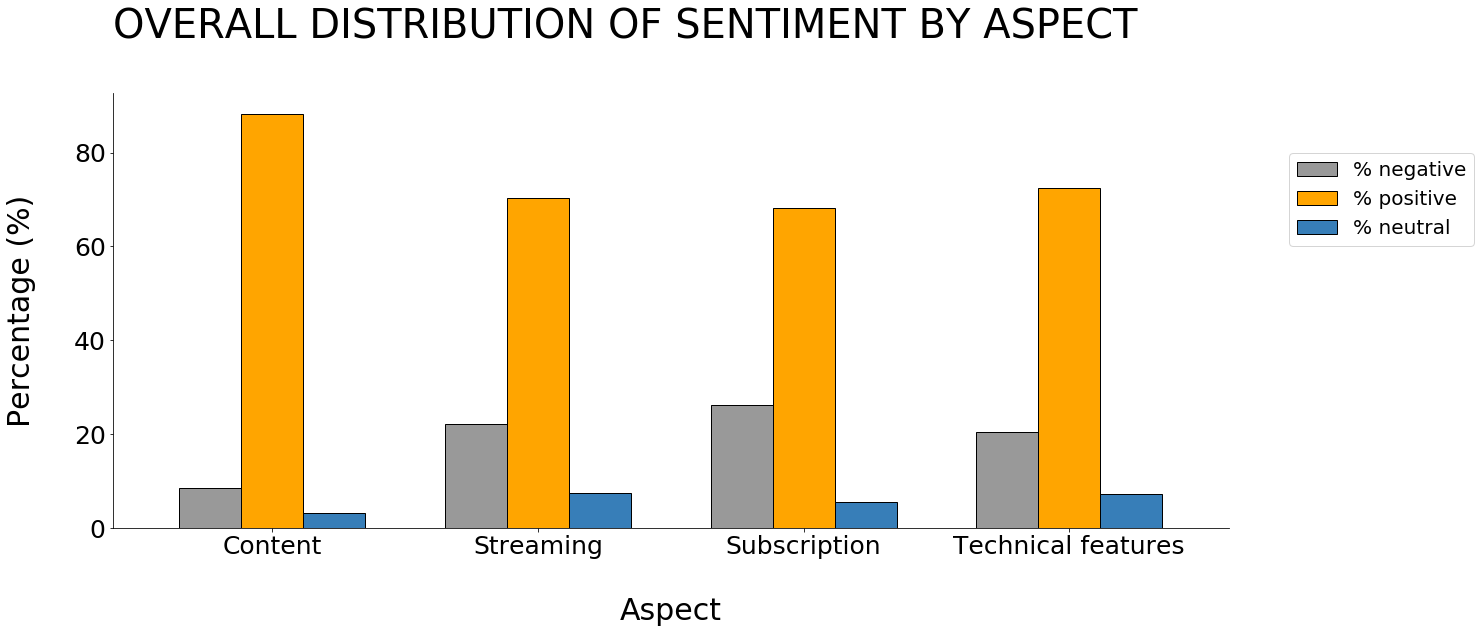

In [162]:
#creating a grouped bar chart for the overall sentiment by aspects
colors = ['#999999', 'orange', '#377eb8']
mylabels=['% negative', '% positive', '% neutral']
ax = sent_pivot.plot(kind='bar', color = colors, edgecolor='black',fontsize=14, figsize=(20,8), width=0.7)
#customizing the title
ax.set_title("OVERALL DISTRIBUTION OF SENTIMENT BY ASPECT\n", fontsize=40, loc='left')
#customizing x label
ax.set_xlabel('\nAspect', fontsize=30)
#customizing y label
ax.set_ylabel('Percentage (%)\n', fontsize=30);
plt.xticks(rotation=0, fontsize = 25);
plt.yticks(rotation=0, fontsize = 25);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=mylabels,borderaxespad=3, prop={'size': 20})
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
plt.show()

In [163]:
#creating a subset of data for negative reviews
neg_sent_topic = sent_topic[sent_topic['score']=='neg']
neg_sent_topic.head()

,score,Dominant_topic,year,month,day
4,neg,Technical features,2021,3,16
8,neg,Content,2021,3,16
14,neg,Technical features,2021,3,15
16,neg,Streaming,2021,3,15
29,neg,Subscription,2021,3,15


In [164]:
#pivoting the tables
sent_year=sent_topic[['Dominant_topic','year', 'score']]
sent_year_group=sent_year.groupby(['Dominant_topic','year', 'score']).size().unstack()
sent_year_group.head()

score                neg  neu   pos
Dominant_topic year                
Content        2010   78   67  1945
               2011  337  186  3331
               2012  468  181  3820
               2013  371  192  3754
               2014  752  309  4296

In [165]:
sent_year_group=sent_year_group.drop(['unidentified'])

In [166]:
#creating the variables that will inform us about the percentahe of the sentiment for each year
sent_year_group['percentage_neg']= round((sent_year_group['neg'] / 
                      (sent_year_group['neg']+ sent_year_group['pos']+sent_year_group['neu']))*100,1)
sent_year_group['percentage_pos']= round((sent_year_group['pos'] / 
                      (sent_year_group['neg']+ sent_year_group['pos']+sent_year_group['neu']))*100,1)
sent_year_group['percentage_neu']= round((sent_year_group['neu'] / 
                      (sent_year_group['neg']+ sent_year_group['pos']+sent_year_group['neu']))*100,1)

In [167]:
#dropping unnecessary columns for the visualization
sent_year_group= sent_year_group.drop(columns= ['neg','neu','pos'])
sent_year_group.head()

score                percentage_neg  percentage_pos  percentage_neu
Dominant_topic year                                                
Content        2010             3.7            93.1             3.2
               2011             8.7            86.4             4.8
               2012            10.5            85.5             4.1
               2013             8.6            87.0             4.4
               2014            14.0            80.2             5.8

In [168]:
# leaving just the percentage of the negative reviews
neg_sent=sent_year_group.drop(columns= ['percentage_pos','percentage_neu'])
neg_sent.head()

score                percentage_neg
Dominant_topic year                
Content        2010             3.7
               2011             8.7
               2012            10.5
               2013             8.6
               2014            14.0

In [169]:
content_sent_neg =neg_sent.loc['Content']
streaming_sent_neg =neg_sent.loc['Streaming']
subscription_sent_neg =neg_sent.loc['Subscription']
technical_sent_neg =neg_sent.loc['Technical features']

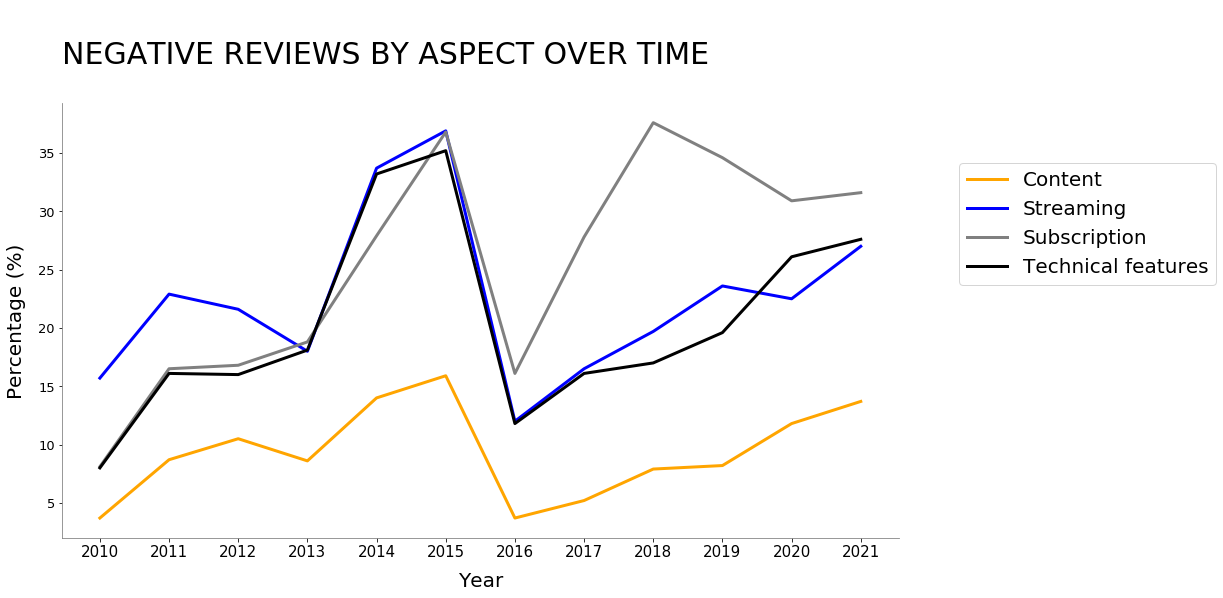

In [170]:
#creating a multiple line chart 
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor('w')
year = content_sent_neg.index.values
replies = content_sent_neg['percentage_neg']
year_str = streaming_sent_neg.index.values
replies_str = streaming_sent_neg['percentage_neg']
year_sub = subscription_sent_neg.index.values
replies_sub = subscription_sent_neg['percentage_neg']
year_tech = technical_sent_neg.index.values
replies_tech = technical_sent_neg['percentage_neg']
ax.plot(year, replies,color = 'orange', label='Content',linewidth=3 )
ax.plot(year_str, replies_str,color = 'blue' , label='Streaming', linewidth=3)
ax.plot(year_sub, replies_sub,color = 'grey', label='Subscription',linewidth=3 )
ax.plot(year_tech, replies_tech,color = 'black', label='Technical features',linewidth=3)
ax.set_title('\nNEGATIVE REVIEWS BY ASPECT OVER TIME\n', fontsize=30,  loc='left')
ax.set_ylabel('Percentage (%)', fontsize=20, labelpad=12)
ax.set_xlabel('Year', fontsize=20, labelpad=12)
ax.grid(False)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=3, prop={'size': 20})
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax = plt.gca()
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=13) 
plt.xticks(year)
plt.show();

In [171]:
#resetting the index
sent_year_group_new=sent_year_group.reset_index()

In [174]:
#pivoting the data to get it ready for the grouped bar chart 
sent_year_group_2021=sent_year_group_new[sent_year_group_new['year']==2021]
sent_year_group_2021.columns
sent_year_group_2021_frame=sent_year_group_2021.drop(columns=['year'])
sent_year_group_2021_frame=sent_year_group_2021_frame.set_index('Dominant_topic')
sent_year_group_2021_frame.head()

score,percentage_neg,percentage_pos,percentage_neu
Dominant_topic,,,
Content,13.7,84.3,2.0
Streaming,27.0,66.0,7.0
Subscription,31.6,64.3,4.1
Technical features,27.6,64.6,7.7


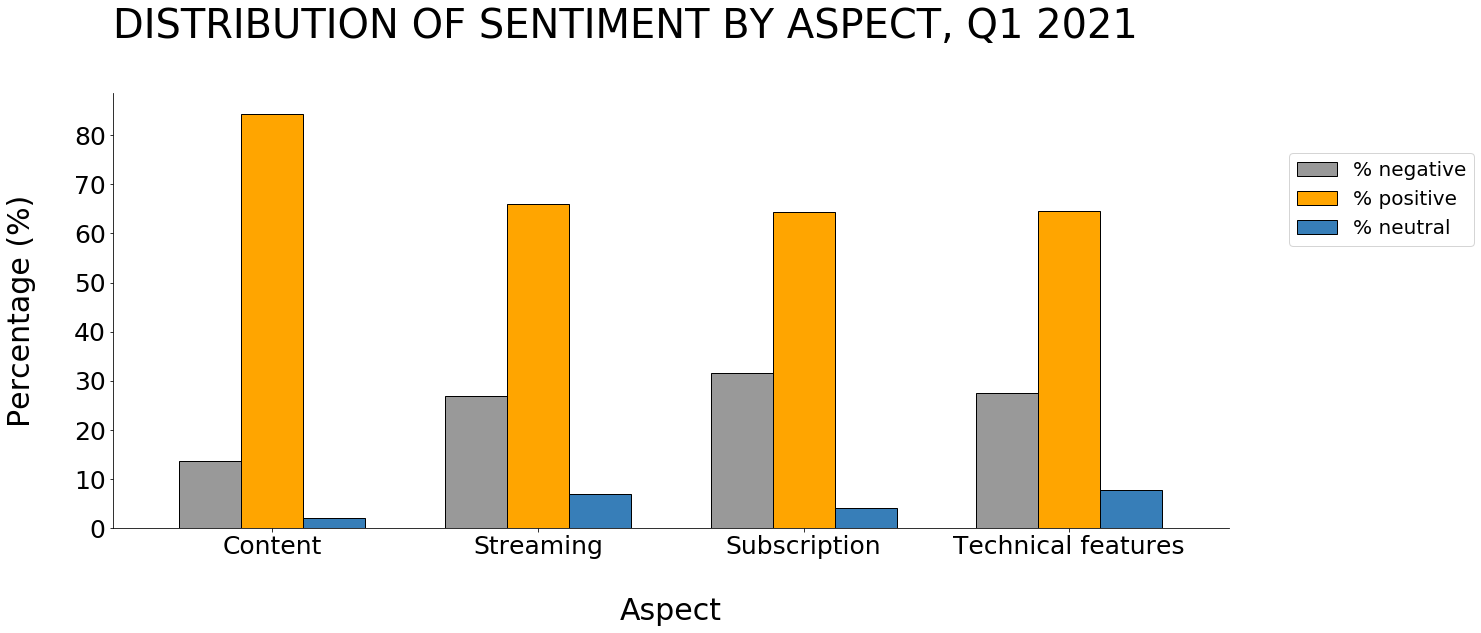

In [175]:
#creating a grouped bar chart 
colors = ['#999999', 'orange','#377eb8']
ax = sent_year_group_2021_frame.plot(kind='bar', color = colors, edgecolor='black',fontsize=14, figsize=(20,8), width=0.7)
#customizing the title
ax.set_title("DISTRIBUTION OF SENTIMENT BY ASPECT, Q1 2021\n", fontsize=40, loc='left')
#customizing x label
ax.set_xlabel('\nAspect', fontsize=30)
#customizing y label
ax.set_ylabel('Percentage (%)\n', fontsize=30);
plt.xticks(rotation=0, fontsize = 25);
plt.yticks(rotation=0, fontsize = 25);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels=mylabels, borderaxespad=3, prop={'size': 20}, fontsize=25)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
plt.show()